# Major League Baseball (MLB) Team Performances Predictions & Analysis

Author: Yuan Gao

Course Project, UC Irvine, Math 10, F22

## Introduction

Introduce your project here.  Maybe 3 sentences.

In this project, I will explore the dataset of Major League Baseball (MLB), and as a baseball fan, I hope to find out some relationships between the team performances and those advances statistics. Also, I would like to predict the team performances. Last but not least, I would like to discover which factor(s) contribute the most to team performances.

## Main Portion of the Project


In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("baseball.csv")
df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


I would like to change the column names from abbreviations to full names for better understanding. At the same time, I would like to change the numbers in columns which represent percentages from decimals to percentages by defining a new function.

In [3]:
df = df.rename({"RS": "Runs Scored", "RA": "Runs Allowed", "W": "Wins", "OBP": "On-Base Percentage",
 "SLG": "Slugging Percentage", "BA": "Batting Average", "G": "Games Played", "OOBP": "Opponents On-Base Percentage", 
 "OSLG": "Opponents Slugging Percentage"}, axis="columns")

In [4]:
df

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [5]:
def to_percent(x):
    return round(x*100,2)

In [6]:
cols = ["On-Base Percentage", "Slugging Percentage", "Batting Average", "Opponents On-Base Percentage", "Opponents Slugging Percentage"]
for x in cols:
    df[x] = df[x].map(to_percent)

In [7]:
df

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage
0,ARI,NL,2012,734,688,81,32.8,41.8,25.9,0,NaN,NaN,162,31.7,41.5
1,ATL,NL,2012,700,600,94,32.0,38.9,24.7,1,4.0,5.0,162,30.6,37.8
2,BAL,AL,2012,712,705,93,31.1,41.7,24.7,1,5.0,4.0,162,31.5,40.3
3,BOS,AL,2012,734,806,69,31.5,41.5,26.0,0,NaN,NaN,162,33.1,42.8
4,CHC,NL,2012,613,759,61,30.2,37.8,24.0,0,NaN,NaN,162,33.5,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,33.0,39.0,26.0,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,32.1,39.4,26.8,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,34.1,44.1,27.8,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,33.5,39.4,27.1,0,NaN,NaN,163,NaN,NaN


In the years before 1999, there is no data of the opponents' statistics. Therefore, we would only use the data from 1999 till 2012.

In [8]:
df = df[df["Year"] > 1998]
df

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage
0,ARI,NL,2012,734,688,81,32.8,41.8,25.9,0,NaN,NaN,162,31.7,41.5
1,ATL,NL,2012,700,600,94,32.0,38.9,24.7,1,4.0,5.0,162,30.6,37.8
2,BAL,AL,2012,712,705,93,31.1,41.7,24.7,1,5.0,4.0,162,31.5,40.3
3,BOS,AL,2012,734,806,69,31.5,41.5,26.0,0,NaN,NaN,162,33.1,42.8
4,CHC,NL,2012,613,759,61,30.2,37.8,24.0,0,NaN,NaN,162,33.5,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,35.6,43.4,27.1,0,NaN,NaN,162,34.5,42.3
416,STL,NL,1999,809,838,75,33.8,42.6,26.2,0,NaN,NaN,161,35.5,42.7
417,TBD,AL,1999,772,913,69,34.3,41.1,27.4,0,NaN,NaN,162,37.1,44.8
418,TEX,AL,1999,945,859,95,36.1,47.9,29.3,1,5.0,4.0,162,34.6,45.9


In [9]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

## Predict Using the Decision Tree Classifier

Since we want to find the relationships between team statistics and team performances (we evaluate team performances by whether the team enters the playoff or not), we would like to use the decision tree classifier to predict the team performances.

In [10]:
del df1["RankSeason"]
del df1["RankPlayoffs"]
del df1["Year"]
del df1["Wins"]
del df1["Runs Scored"]
del df1["Runs Allowed"]
del df1["Games Played"]

In [11]:
df1.columns

Index(['Team', 'League', 'On-Base Percentage', 'Slugging Percentage',
       'Batting Average', 'Playoffs', 'Opponents On-Base Percentage',
       'Opponents Slugging Percentage'],
      dtype='object')

In [12]:
from pandas.api.types import is_numeric_dtype
num_cols = [c for c in df1.columns if is_numeric_dtype(df[c])]
num_cols

['On-Base Percentage',
 'Slugging Percentage',
 'Batting Average',
 'Playoffs',
 'Opponents On-Base Percentage',
 'Opponents Slugging Percentage']

In [13]:
df1_1 = df[num_cols].drop("Playoffs", axis=1)
df1_1

,On-Base Percentage,Slugging Percentage,Batting Average,Opponents On-Base Percentage,Opponents Slugging Percentage
0,32.8,41.8,25.9,31.7,41.5
1,32.0,38.9,24.7,30.6,37.8
2,31.1,41.7,24.7,31.5,40.3
3,31.5,41.5,26.0,33.1,42.8
4,30.2,37.8,24.0,33.5,42.4
...,...,...,...,...,...
415,35.6,43.4,27.1,34.5,42.3
416,33.8,42.6,26.2,35.5,42.7
417,34.3,41.1,27.4,37.1,44.8
418,36.1,47.9,29.3,34.6,45.9


In [14]:
df1_1.isna().any(axis=0)

On-Base Percentage               False
Slugging Percentage              False
Batting Average                  False
Opponents On-Base Percentage     False
Opponents Slugging Percentage    False
dtype: bool

In [15]:
df1_1.columns

Index(['On-Base Percentage', 'Slugging Percentage', 'Batting Average',
       'Opponents On-Base Percentage', 'Opponents Slugging Percentage'],
      dtype='object')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df1_1, df1["Playoffs"], test_size=0.2, random_state=0)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
for nodes in range(10,400,5):
    clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=nodes)
    clf.fit(X_train, y_train)
    a = clf.score(X_train, y_train)
    b = clf.score(X_test, y_test)
    print(a,b)

0.8988095238095238 0.7976190476190477
0.9077380952380952 0.7976190476190477
0.9255952380952381 0.7619047619047619
0.9404761904761905 0.7738095238095238
0.9613095238095238 0.7857142857142857
0.9732142857142857 0.7738095238095238
0.9821428571428571 0.75
0.9880952380952381 0.7857142857142857
0.9940476190476191 0.7142857142857143
0.9970238095238095 0.7619047619047619
0.9970238095238095 0.7142857142857143
0.9970238095238095 0.7380952380952381
0.9970238095238095 0.7380952380952381
0.9970238095238095 0.75
0.9970238095238095 0.75
0.9970238095238095 0.7380952380952381
0.9970238095238095 0.7142857142857143
0.9970238095238095 0.75
0.9970238095238095 0.7380952380952381
0.9970238095238095 0.7261904761904762
0.9970238095238095 0.75
0.9970238095238095 0.8095238095238095
0.9970238095238095 0.7380952380952381
0.9970238095238095 0.75
0.9970238095238095 0.75
0.9970238095238095 0.7261904761904762
0.9970238095238095 0.7380952380952381
0.9970238095238095 0.7619047619047619
0.9970238095238095 0.7619047619047

In the process above, I choose the max_leaf_nodes in the range (10,400) with an interval of 5. The result shows that the possibility that the train data predicts correctly is always around 0.99, and the possibility that the test data predicts correctly is always around 0.73 to 0.77. Therefore, there does not exist overfitting issue in the model above.

In [19]:
clf_1 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=225)

In [20]:
clf_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=225)

In [21]:
clf_1.score(X_train, y_train)

0.9970238095238095

In [22]:
clf_1.score(X_test, y_test)

0.7619047619047619

In [23]:
from sklearn.tree import plot_tree

In [24]:
import matplotlib.pyplot as plt

In [25]:
fig = plt.figure(figsize=(100,200))
plot_tree(
    clf_1,
    feature_names=clf_1.feature_names_in_,
    filled=True
);

Since there's no overfitting issue in the model, I plan to plot one decision tree with a random number 225 as the max_leaf_nodes. We could discover that the clf_1.score is close to the clf.score above.

## Predict Using the Logistic Regression

We have already used the DecisionTree Classifier to predict the possibility of entering playoff games. Therefore, I would like to use Logistic Regression to predict the possibility as well, and see if the results are similar or different.

In [26]:
df1_1

,On-Base Percentage,Slugging Percentage,Batting Average,Opponents On-Base Percentage,Opponents Slugging Percentage
0,32.8,41.8,25.9,31.7,41.5
1,32.0,38.9,24.7,30.6,37.8
2,31.1,41.7,24.7,31.5,40.3
3,31.5,41.5,26.0,33.1,42.8
4,30.2,37.8,24.0,33.5,42.4
...,...,...,...,...,...
415,35.6,43.4,27.1,34.5,42.3
416,33.8,42.6,26.2,35.5,42.7
417,34.3,41.1,27.4,37.1,44.8
418,36.1,47.9,29.3,34.6,45.9


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf_2 = LogisticRegression()

In [29]:
clf_2.fit(df1_1,df["Playoffs"])

LogisticRegression()

In [30]:
df2["Pred"] = clf_2.predict(df1_1)

In [31]:
df2

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage,Pred
0,ARI,NL,2012,734,688,81,32.8,41.8,25.9,0,NaN,NaN,162,31.7,41.5,0
1,ATL,NL,2012,700,600,94,32.0,38.9,24.7,1,4.0,5.0,162,30.6,37.8,0
2,BAL,AL,2012,712,705,93,31.1,41.7,24.7,1,5.0,4.0,162,31.5,40.3,0
3,BOS,AL,2012,734,806,69,31.5,41.5,26.0,0,NaN,NaN,162,33.1,42.8,0
4,CHC,NL,2012,613,759,61,30.2,37.8,24.0,0,NaN,NaN,162,33.5,42.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,35.6,43.4,27.1,0,NaN,NaN,162,34.5,42.3,0
416,STL,NL,1999,809,838,75,33.8,42.6,26.2,0,NaN,NaN,161,35.5,42.7,0
417,TBD,AL,1999,772,913,69,34.3,41.1,27.4,0,NaN,NaN,162,37.1,44.8,0
418,TEX,AL,1999,945,859,95,36.1,47.9,29.3,1,5.0,4.0,162,34.6,45.9,0


In [32]:
df2[df2["Playoffs"] == df2["Pred"]]

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage,Pred
0,ARI,NL,2012,734,688,81,32.8,41.8,25.9,0,NaN,NaN,162,31.7,41.5,0
3,BOS,AL,2012,734,806,69,31.5,41.5,26.0,0,NaN,NaN,162,33.1,42.8,0
4,CHC,NL,2012,613,759,61,30.2,37.8,24.0,0,NaN,NaN,162,33.5,42.4,0
5,CHW,AL,2012,748,676,85,31.8,42.2,25.5,0,NaN,NaN,162,31.9,40.5,0
7,CLE,AL,2012,667,845,68,32.4,38.1,25.1,0,NaN,NaN,162,33.6,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,SEA,AL,1999,859,905,79,34.3,45.5,26.9,0,NaN,NaN,162,36.8,45.4,0
415,SFG,NL,1999,872,831,86,35.6,43.4,27.1,0,NaN,NaN,162,34.5,42.3,0
416,STL,NL,1999,809,838,75,33.8,42.6,26.2,0,NaN,NaN,161,35.5,42.7,0
417,TBD,AL,1999,772,913,69,34.3,41.1,27.4,0,NaN,NaN,162,37.1,44.8,0


In [33]:
358/420

0.8523809523809524

We could find out that in 420 rows of data, there are 358 rows which the prediction equals to the real statistic. We can see that there is nearly 85% of the correct predictions, which performs better than the results under DecisionTreeClassifier.

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(clf_2.predict(X_test), y_test)

0.13095238095238096

In [36]:
mean_absolute_error(clf_2.predict(X_train), y_train)

0.15178571428571427

We could discover that the error of the training set is larger than the error of the test set. Therefore, the results could be inaccurate.

In [37]:
alt.data_transformers.enable('default', max_rows=500)

c = alt.Chart(df2).mark_rect().encode(
    x="Playoffs:N",
    y="Pred:N",
    color = alt.Color('count()', scale = alt.Scale(scheme = "redpurple", reverse = True)),
)

c_text = alt.Chart(df2).mark_text(color="black").encode(
    x="Playoffs:N",
    y="Pred:N",
    text="Pred"
)

(c+c_text).properties(
    height=200,
    width=200
)

alt.LayerChart(...)

From the confusion matrix above, we could also verify our result above (85% correct predictions) as the two squares on the antidiagonal (wrong predictions) has the darkest color, which means that neither of them has counts over 50. 

## Figure Out Which Factor Is the Most Important 

As a baseball fan, I understand the meaning and importance of all these statistics. However, I'm not sure which one(s) is the most important for teams to make playoffs. Thus, I would like to know which factor contributes the most to team performances.

Since the method of Logistic Regression may not be accurate, I would use the test statistics from the DecisionTree Classifier method(clf_1).

In [38]:
clf_1.feature_importances_

array([0.14013201, 0.2535732 , 0.0887258 , 0.36051521, 0.15705379])

In [39]:
pd.Series(clf_1.feature_importances_, index=df1_1.columns)

On-Base Percentage               0.140132
Slugging Percentage              0.253573
Batting Average                  0.088726
Opponents On-Base Percentage     0.360515
Opponents Slugging Percentage    0.157054
dtype: float64

In [40]:
df_fi = pd.DataFrame({"importance": clf_1.feature_importances_, "factors": clf_1.feature_names_in_})

In [41]:
df_fi

,importance,factors
0,0.140132,On-Base Percentage
1,0.253573,Slugging Percentage
2,0.088726,Batting Average
3,0.360515,Opponents On-Base Percentage
4,0.157054,Opponents Slugging Percentage


In [42]:
alt.Chart(df_fi).mark_bar().encode(
    x="factors",
    y="importance",
    tooltip=["importance"]
).properties(
    title = 'Importance of Factors'
)

alt.Chart(...)

Thus, we could find out that the most important factor here is the opponents on-base percentage, which means that good pitchers and infielders with good defense could play the most important roles to help the team.

In [43]:
c1=alt.Chart(df).mark_circle().encode(
    x=alt.X("Opponents On-Base Percentage", scale=alt.Scale(zero=False)),
    y=alt.Y("Slugging Percentage", scale=alt.Scale(zero=False)),
    color="Playoffs:Q",
    tooltip=["Team", "Year", "Opponents On-Base Percentage","Slugging Percentage"],
).interactive()

c1

alt.Chart(...)

This graph clearly shows that the data points in the upper-left graph are more likely to make the playoffs since they have low opponents on-base percentage and high slugging percentage.

In [71]:
import seaborn as sns

<AxesSubplot:xlabel='Opponents On-Base Percentage', ylabel='Playoffs'>

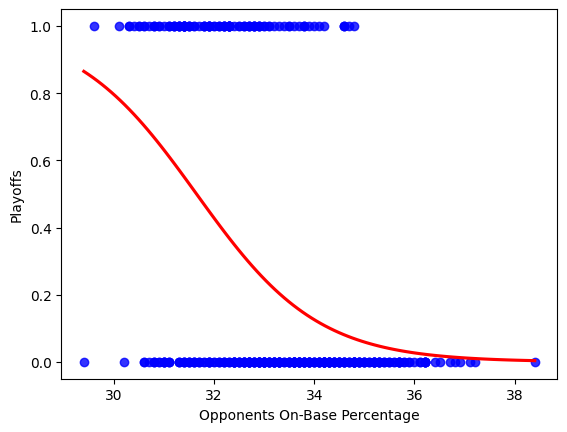

In [80]:
sns.regplot(x=df1_1["Opponents On-Base Percentage"], y=df["Playoffs"], data=df2, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

I also use the seaborn to draw a graph with logistic regression. I also use the most important factor (opponents on-base percentage) to model the predicted possibility of making the playoffs. It shows similar trends compared with the analysis above.

## Analysis of Offense and Defense

Next, we would break up the data into offense part and defense part. For the offense, we would like to see the relationship between Runs Scored and other statistics (Batting Average, On-Base Percentage, Slugging Percentage). For the defense, we would like to see the relationship between Runs Saved and other statistics (Opponents On-Base Percentage, Opponents Slugging Percentage).

In [44]:
df3

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage
0,ARI,NL,2012,734,688,81,32.8,41.8,25.9,0,NaN,NaN,162,31.7,41.5
1,ATL,NL,2012,700,600,94,32.0,38.9,24.7,1,4.0,5.0,162,30.6,37.8
2,BAL,AL,2012,712,705,93,31.1,41.7,24.7,1,5.0,4.0,162,31.5,40.3
3,BOS,AL,2012,734,806,69,31.5,41.5,26.0,0,NaN,NaN,162,33.1,42.8
4,CHC,NL,2012,613,759,61,30.2,37.8,24.0,0,NaN,NaN,162,33.5,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,35.6,43.4,27.1,0,NaN,NaN,162,34.5,42.3
416,STL,NL,1999,809,838,75,33.8,42.6,26.2,0,NaN,NaN,161,35.5,42.7
417,TBD,AL,1999,772,913,69,34.3,41.1,27.4,0,NaN,NaN,162,37.1,44.8
418,TEX,AL,1999,945,859,95,36.1,47.9,29.3,1,5.0,4.0,162,34.6,45.9


### Offense

In [45]:
df3_of = df3[["On-Base Percentage", "Slugging Percentage", "Batting Average"]]
df3_of

,On-Base Percentage,Slugging Percentage,Batting Average
0,32.8,41.8,25.9
1,32.0,38.9,24.7
2,31.1,41.7,24.7
3,31.5,41.5,26.0
4,30.2,37.8,24.0
...,...,...,...
415,35.6,43.4,27.1
416,33.8,42.6,26.2
417,34.3,41.1,27.4
418,36.1,47.9,29.3


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df3_of, df3["Runs Scored"], test_size=0.2, random_state=0)

In [47]:
for nodes in range(10,400,5):
    clf_3 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=nodes)
    clf.fit(X_train, y_train)
    a = clf.score(X_train, y_train)
    b = clf.score(X_test, y_test)
    print(a,b)

0.5744047619047619 0.0
0.5952380952380952 0.0
0.5892857142857143 0.0
0.5892857142857143 0.0
0.5922619047619048 0.011904761904761904
0.5803571428571429 0.0
0.5892857142857143 0.011904761904761904
0.5863095238095238 0.0
0.5863095238095238 0.0
0.5922619047619048 0.0
0.5833333333333334 0.0
0.5803571428571429 0.0
0.5803571428571429 0.0
0.5803571428571429 0.0
0.5803571428571429 0.0
0.5803571428571429 0.0
0.5744047619047619 0.0
0.5892857142857143 0.0
0.5892857142857143 0.0
0.5863095238095238 0.0
0.5833333333333334 0.0
0.5922619047619048 0.0
0.5892857142857143 0.0
0.5773809523809523 0.0
0.5773809523809523 0.0
0.5922619047619048 0.0
0.5803571428571429 0.0
0.5773809523809523 0.0
0.5863095238095238 0.0
0.5892857142857143 0.0
0.5863095238095238 0.0
0.5773809523809523 0.0
0.5744047619047619 0.0
0.5833333333333334 0.0
0.5744047619047619 0.0
0.5684523809523809 0.0
0.5803571428571429 0.0
0.5833333333333334 0.0
0.5863095238095238 0.0
0.5892857142857143 0.0
0.5863095238095238 0.0
0.5803571428571429 0.0


In [48]:
clf_4 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=225)

In [49]:
clf_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=225)

In [50]:
pd.Series(clf_4.feature_importances_, index=df3_of.columns)

On-Base Percentage     0.310467
Slugging Percentage    0.321475
Batting Average        0.368057
dtype: float64

Thus, we could discover that all three factors are nearly equally important, but the slugging percentage is more important, which is understandable since home runs are counted as slugs in the statistics.

### Defense

In [51]:
df3_de = df3[["Opponents On-Base Percentage", "Opponents Slugging Percentage"]]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df3_de, df3["Runs Allowed"], test_size=0.2, random_state=0)

In [53]:
for nodes in range(10,400,5):
    clf_5 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=nodes)
    clf.fit(X_train, y_train)
    a = clf.score(X_train, y_train)
    b = clf.score(X_test, y_test)
    print(a,b)

0.6607142857142857 0.011904761904761904
0.6547619047619048 0.011904761904761904
0.6547619047619048 0.011904761904761904
0.6607142857142857 0.011904761904761904
0.6636904761904762 0.011904761904761904
0.6547619047619048 0.011904761904761904
0.6607142857142857 0.011904761904761904
0.6607142857142857 0.011904761904761904
0.6547619047619048 0.011904761904761904
0.6547619047619048 0.011904761904761904
0.6547619047619048 0.023809523809523808
0.6547619047619048 0.023809523809523808
0.6577380952380952 0.023809523809523808
0.6577380952380952 0.023809523809523808
0.6547619047619048 0.011904761904761904
0.6577380952380952 0.023809523809523808
0.6636904761904762 0.011904761904761904
0.6607142857142857 0.023809523809523808
0.6577380952380952 0.023809523809523808
0.6577380952380952 0.011904761904761904
0.6636904761904762 0.023809523809523808
0.6547619047619048 0.023809523809523808
0.6547619047619048 0.011904761904761904
0.6577380952380952 0.011904761904761904
0.6577380952380952 0.011904761904761904


In [54]:
clf_6 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=225)

In [55]:
clf_6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=225)

In [56]:
pd.Series(clf_6.feature_importances_, index=df3_de.columns)

Opponents On-Base Percentage     0.504177
Opponents Slugging Percentage    0.495823
dtype: float64

We could discover that these two factors are almost equally important. However, this could only be used as a reference since this dataset doesn't provide us with the opponents' batting average.

## Los Angeles Dodgers Performance Analysis

As a Dodgers fan, I would like to analyze the team's performance in the end. I would try to use some new methods here, such as StandardScaler and K-Neighbors Classifier.

In [57]:
df4

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage
0,ARI,NL,2012,734,688,81,32.8,41.8,25.9,0,NaN,NaN,162,31.7,41.5
1,ATL,NL,2012,700,600,94,32.0,38.9,24.7,1,4.0,5.0,162,30.6,37.8
2,BAL,AL,2012,712,705,93,31.1,41.7,24.7,1,5.0,4.0,162,31.5,40.3
3,BOS,AL,2012,734,806,69,31.5,41.5,26.0,0,NaN,NaN,162,33.1,42.8
4,CHC,NL,2012,613,759,61,30.2,37.8,24.0,0,NaN,NaN,162,33.5,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,35.6,43.4,27.1,0,NaN,NaN,162,34.5,42.3
416,STL,NL,1999,809,838,75,33.8,42.6,26.2,0,NaN,NaN,161,35.5,42.7
417,TBD,AL,1999,772,913,69,34.3,41.1,27.4,0,NaN,NaN,162,37.1,44.8
418,TEX,AL,1999,945,859,95,36.1,47.9,29.3,1,5.0,4.0,162,34.6,45.9


In [58]:
df_4 = df4.loc[df['Team'] == 'LAD']
df_4

,Team,League,Year,Runs Scored,Runs Allowed,Wins,On-Base Percentage,Slugging Percentage,Batting Average,Playoffs,RankSeason,RankPlayoffs,Games Played,Opponents On-Base Percentage,Opponents Slugging Percentage
13,LAD,NL,2012,637,597,86,31.7,37.4,25.2,0,NaN,NaN,162,31.0,36.4
44,LAD,NL,2011,644,612,82,32.2,37.5,25.7,0,NaN,NaN,161,31.0,37.1
74,LAD,NL,2010,667,692,80,32.2,37.9,25.2,0,NaN,NaN,162,31.6,37.8
104,LAD,NL,2009,780,611,95,34.6,41.2,27.0,1,3.0,3.0,162,31.2,36.1
134,LAD,NL,2008,700,648,84,33.3,39.9,26.4,1,7.0,3.0,162,31.5,37.6
164,LAD,NL,2007,735,727,82,33.7,40.6,27.5,0,NaN,NaN,162,32.6,39.9
194,LAD,NL,2006,820,751,88,34.8,43.2,27.6,1,5.0,4.0,162,33.0,41.8
224,LAD,NL,2005,685,755,71,32.6,39.5,25.3,0,NaN,NaN,162,32.7,42.9
254,LAD,NL,2004,761,684,93,33.2,42.3,26.2,1,5.0,4.0,162,32.3,40.8
284,LAD,NL,2003,574,556,85,30.3,36.8,24.3,0,NaN,NaN,162,30.6,35.4


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [60]:
scaler = StandardScaler()
df_4[["Slugging Percentage","Opponents On-Base Percentage"]] = scaler.fit_transform(df_4[["Slugging Percentage","Opponents On-Base Percentage"]])

X_train, X_test, y_train, y_test = train_test_split(df_4[["Slugging Percentage","Opponents On-Base Percentage"]], df_4["Wins"], test_size=0.2)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [61]:
X = df_4[["Slugging Percentage", "Opponents On-Base Percentage"]]
X

,Slugging Percentage,Opponents On-Base Percentage
13,-1.373455,-1.121558
44,-1.326785,-1.121558
74,-1.140101,-0.453396
104,0.400036,-0.898838
134,-0.206685,-0.564756
164,0.120011,0.660208
194,1.333452,1.105650
224,-0.393368,0.771568
254,0.913415,0.326127
284,-1.653480,-1.567000


In [63]:
y = df_4["Wins"]
y

13     86
44     82
74     80
104    95
134    84
164    82
194    88
224    71
254    93
284    85
314    92
344    86
374    86
404    77
Name: Wins, dtype: int64

We're randomly picking the n_neighbors=3.

In [69]:
clf_7 = KNeighborsClassifier(n_neighbors=3)
clf_7.fit(X_train, y_train)
df_4["pred"] = clf_7.predict(df_4[["Slugging Percentage","Opponents On-Base Percentage"]])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
c2 = alt.Chart(df_4).mark_circle().encode(
    x="Opponents On-Base Percentage",
    y="Slugging Percentage",
    color=alt.Color("pred", title="Wins"),
    tooltip = ("Year", "Playoffs", "Slugging Percentage", "Opponents On-Base Percentage")
).properties(
    width=500,
    height=200,
)

c2

alt.Chart(...)

Here, we can find out that the trend is similar to the graph c1 above. The data points on the upper-left could always make playoffs. However, the trend is not that obvious to wins since entering the playoffs or not also depends on the performances of other teams. Therefore, we might not get a clear conclusion here by just analyzing one team.

## Summary


In this project, we discover that using the Decision Tree Classifier is most accurate to make predictions than using the logistic regression. 

We also find out that slugging percentage and opponents on-base percentage are two most important factors affecting the teams' performances. We also find out that in teams' offense, slugging percentage is the most important factor. Thus, we suggest teams to find players who can hit hard as well as players who are good at defense.

However, we could not find a clear conclusion/relationship in teams' defense. Also, we cannot predict accurately whether a team enters the playoff or not by only analyzing the statistics of that team.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

Kaggle.
https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012

* List any other references that you found helpful.

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
I learned basic k-neighbors classifier here.

https://christopherdavisuci.github.io/UCI-Math-10-S22/Week7/Week7-Friday.html
https://www.statology.org/plot-logistic-regression-in-python/
I learned the logistic regression from here.


## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20db84bc-c87e-4591-bb66-31afb1efdb05' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>